# Deep Learning Examples

**Note: Run this notebook in Google Colab for best compatibility.**

This notebook demonstrates neural networks and transformers using TensorFlow/Keras and Hugging Face.


## 1. Three-Layer Neural Network


### 1.1 Data Loading


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")
print(f"Feature dimensions: {x_train.shape[1]}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: 60000
Test samples: 10000
Feature dimensions: 784


### 1.2 Model Architecture


In [3]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\pbiai\miniconda3\envs\ironhack_env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

### 1.3 Training


In [4]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9234 - loss: 0.2564 - val_accuracy: 0.9621 - val_loss: 0.1216
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9707 - loss: 0.0947 - val_accuracy: 0.9707 - val_loss: 0.0922
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9825 - loss: 0.0559 - val_accuracy: 0.9743 - val_loss: 0.0890
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9871 - loss: 0.0394 - val_accuracy: 0.9726 - val_loss: 0.0925
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9714 - val_loss: 0.1002
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9929 - loss: 0.0207 - val_accuracy: 0.9783 - val_loss: 0.0863
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9943 - loss: 0.0176 - val_accuracy: 0.9778 - val_loss: 0.0850
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9940 - loss: 0.0185 - val_ac

### 1.4 Evaluation


Test accuracy: 0.9792
Test loss: 0.0838


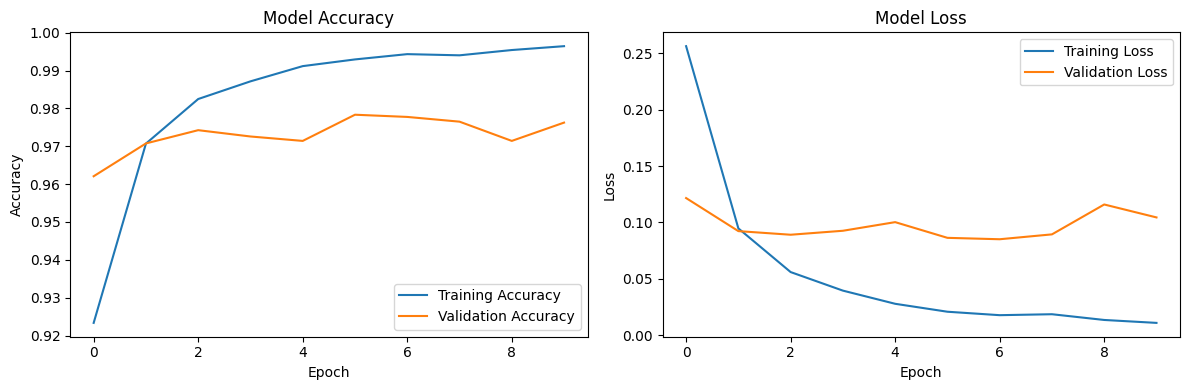

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


## 2. Transformer for Zero-Shot Sentiment Classification


### 2.1 Setup and Model Loading


In [6]:
!pip install transformers torch


  Using cached filelock-3.20.3-py3-none-any.whl.metadata (2.1 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached anyio-4.12.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   --------------------- ------------------ 5.5/10.3 MB 27.6 MB/s eta 0:00:01
   ---------------------------------------  10.2/10.3 MB 30.5 MB/s eta 0:00:01
   ---------------------------------------- 10.3/10.3 MB 20.2 MB/s  0:00:00
   ---------------------------------------- 0.0/553.3 kB ? eta -:--:--
   ---------------------------------------- 553.3/553.3 kB 9.4 MB/s  0:00:00
Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl (2.9 MB)
Using cached httpx-0.28.1-py3-none-any.w

In [9]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", 
                     model="facebook/bart-large-mnli")


config.json: 0.00B [00:00, ?B/s]

c:\Users\pbiai\miniconda3\envs\ironhack_env\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\pbiai\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/515 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

### 2.2 Zero-Shot Classification Examples


In [10]:
candidate_labels = ["positive", "negative", "neutral"]

text1 = "I absolutely love this product! It's amazing!"
result1 = classifier(text1, candidate_labels)
print(f"Text: {text1}")
print(f"Labels: {result1['labels']}")
print(f"Scores: {result1['scores']}")
print()


Text: I absolutely love this product! It's amazing!
Labels: ['positive', 'neutral', 'negative']
Scores: [0.9866077899932861, 0.010784151032567024, 0.0026079979725182056]



In [11]:
text2 = "This is the worst experience I've ever had."
result2 = classifier(text2, candidate_labels)
print(f"Text: {text2}")
print(f"Labels: {result2['labels']}")
print(f"Scores: {result2['scores']}")
print()


Text: This is the worst experience I've ever had.
Labels: ['negative', 'neutral', 'positive']
Scores: [0.9959321618080139, 0.0020939463283866644, 0.001973840408027172]



In [12]:
text3 = "The weather is okay today, nothing special."
result3 = classifier(text3, candidate_labels)
print(f"Text: {text3}")
print(f"Labels: {result3['labels']}")
print(f"Scores: {result3['scores']}")
print()


Text: The weather is okay today, nothing special.
Labels: ['neutral', 'positive', 'negative']
Scores: [0.9457893967628479, 0.0398571603000164, 0.014353387989103794]



### 2.3 Batch Classification


In [13]:
texts = [
    "This movie is fantastic!",
    "I hate waiting in long lines.",
    "The service was acceptable.",
    "Best purchase I've made this year!",
    "Terrible quality, very disappointed."
]

results = classifier(texts, candidate_labels)

for i, (text, result) in enumerate(zip(texts, results)):
    print(f"Text {i+1}: {text}")
    print(f"Predicted: {result['labels'][0]} (score: {result['scores'][0]:.4f})")
    print()


Text 1: This movie is fantastic!
Predicted: positive (score: 0.9956)

Text 2: I hate waiting in long lines.
Predicted: negative (score: 0.8922)

Text 3: The service was acceptable.
Predicted: positive (score: 0.9060)

Text 4: Best purchase I've made this year!
Predicted: positive (score: 0.9933)

Text 5: Terrible quality, very disappointed.
Predicted: negative (score: 0.9980)

